<a href="https://colab.research.google.com/github/Ka2ntu/Machine-Learning/blob/main/Boston_property.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded =files.upload()


Saving boston.csv to boston.csv


In [2]:
import io


In [3]:
import pandas as pd
import numpy as np


# Problem statement
## Data Dictionary
* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million) [parts/10M]
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per $10,000 [$/10k]
* PTRATIO: pupil-teacher ratio by town
* B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population

Output variable:
* MEDV: Median value of owner-occupied homes in $1000's [k$]




In [4]:
data = pd.read_csv(io.BytesIO(uploaded['boston.csv']))

In [5]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [6]:
data.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB




*   all features are numerical
*   there are 14 features 



In [8]:
data.shape

(506, 14)

In [9]:
data1=data.copy()

In [10]:
data.duplicated().sum()

0

In [11]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000




*  explain what u understand



# DATA PRE-PROCESSING
## EDA
### BIVARIATE ANALYSIS


#### OBSERVATIONS ON CRIM

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### Using a scatter plot to observe relationships to target variable

* Observation of Crime Rate (CRIM) vs Target Variable


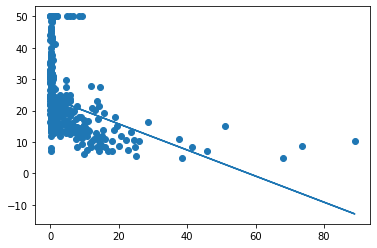

In [13]:

x = data["CRIM"]
y= data["MEDV"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mygraph = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mygraph)
plt.show()

to see the correlation relationship between Crime rate and median value of owner occupied homes

In [14]:
print("Corr value is:",r)

Corr value is: -0.38830460858681143


* From the graph and corr relation we see that the higher the crime rate, the lower the MEDV
* High valued properties, lower crime rates

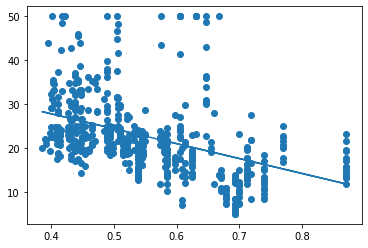

Corr value is: -0.4273207723732826


In [15]:
x = data["NOX"]
y= data["MEDV"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mygraph = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mygraph)
plt.show()
print("Corr value is:",r)

Observation on Number of rooms vs target variable

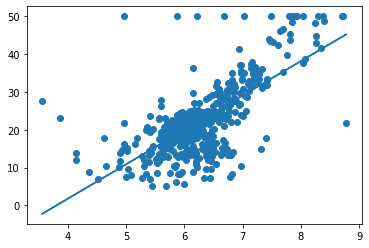

Corr value is: 0.6953599470715394


In [16]:
x = data["RM"]
y= data["MEDV"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mygraph = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mygraph)
plt.show()
print("Corr value is:",r)


* More properties with an average of 6 rooms have a MEDV of 15K to 30K
* The RM value is positively correlated to MEDV 

Observation on DIS vs Target variable

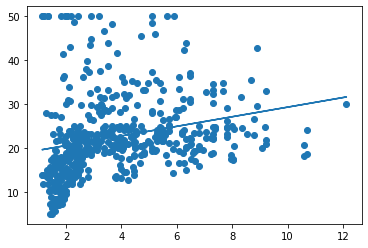

Corr value is: 0.2499287340859039


In [17]:
x = data["DIS"]
y= data["MEDV"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mygraph = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mygraph)
plt.show()
print("Corr value is:",r)

* More low valued properties of less than 10K to ~25K have closer distances to Boston Employment Centers

* Observation on RAD Vs Target

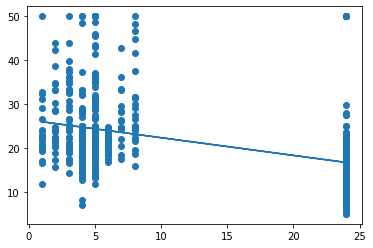

Corr value is: -0.3816262306397776


In [18]:
x = data["RAD"]
y= data["MEDV"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mygraph = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mygraph)
plt.show()
print("Corr value is:",r)

* There is a negative correlation between RAD and target variable
* properties with values of less than 10K to 25K have higher RAD, and properties of values between 12K to ~35K have a RAD of 4 to 5

* Observations on TAX vs Target

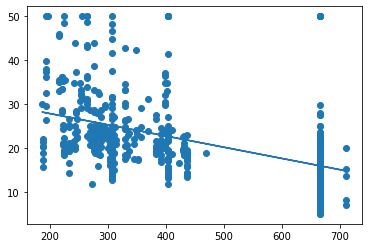

Corr value is: -0.4685359335677668


In [19]:
x = data["TAX"]
y= data["MEDV"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mygraph = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mygraph)
plt.show()
print("Corr value is:",r)

* Observation on PTRATIO vs Target

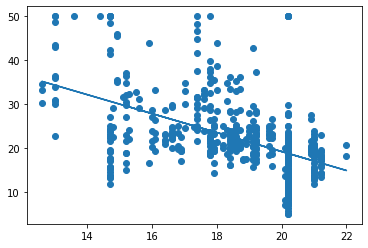

Corr value is: -0.5077866855375615


In [20]:
x = data["PTRATIO"]
y= data["MEDV"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mygraph = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mygraph)
plt.show()
print("Corr value is:",r)

* Observation on B vs Target

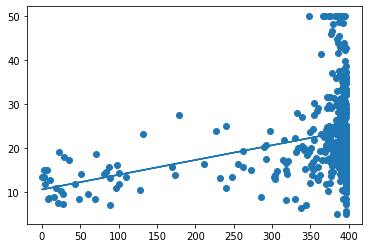

Corr value is: 0.33346081965706664


In [21]:
x = data["B"]
y= data["MEDV"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mygraph = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mygraph)
plt.show()
print("Corr value is:",r)

* Obseravtion on LSTAT VS Target

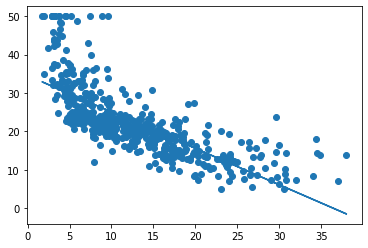

Corr value is: -0.7376627261740151


In [22]:
x = data["LSTAT"]
y= data["MEDV"]

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mygraph = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mygraph)
plt.show()
print("Corr value is:",r)

* ~ 4% to 25 % of lower status people have properties of value between 12K to 35K

### Multivariate correlation 
#### Using Corr Heatmap

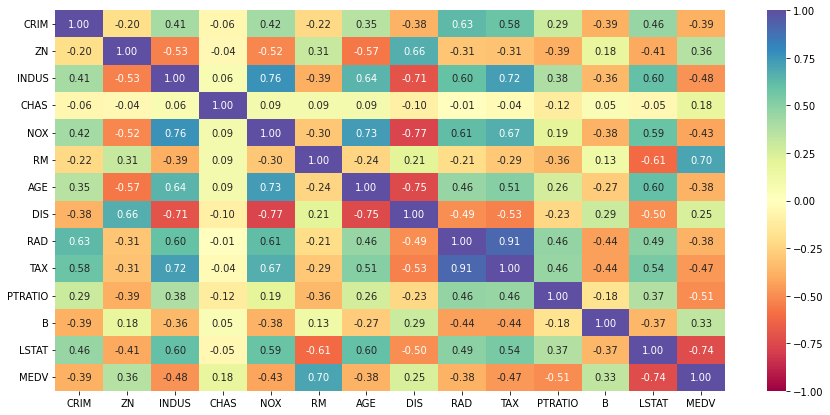

In [23]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

# Data Pre-Processing

In [24]:
percent_missing_data= round(data.isnull().sum()*100/len(data),3)
missing_value_data= pd.DataFrame({'Variable_Name' : data.columns,
                                "Percentage_Missing" : percent_missing_data})
missing_value_data.sample(10)

,Variable_Name,Percentage_Missing
TAX,TAX,0.0
LSTAT,LSTAT,0.0
DIS,DIS,0.0
MEDV,MEDV,0.0
INDUS,INDUS,0.0
ZN,ZN,0.0
RM,RM,0.0
PTRATIO,PTRATIO,0.0
AGE,AGE,0.0
CHAS,CHAS,0.0


# MODELLING

In [25]:
X = data.drop(["MEDV"], axis= 1)
y= data["MEDV"]

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [27]:
# Splitting data into training, validation and test set:
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42
)
print(X_train.shape, X_val.shape, X_test.shape)

(303, 13) (101, 13) (102, 13)


In [28]:
#Lr Model
#lr=LinearRegression(C=10, max_iter=1000, n_jobs = -1 , random_state = 42)



# create an instance of Linear Regression with parameters
lr = LinearRegression(n_jobs=-1, fit_intercept=True)


In [29]:
lr.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [30]:
y_pred= lr.predict(X_val)

#### Testing model performance using R-Squared

In [31]:
  rsq= lr.score(X_train,y_train)
  print(f"coefficient of determination: {rsq}")

coefficient of determination: 0.7588259716766129


#### Testing model perfomance using Mean Squared Error

In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
mse = mean_squared_error(y_val, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 22.36506109520016


### Creating a Gradient Boosting Regression model

In [34]:
from sklearn.ensemble import GradientBoostingRegressor

In [35]:
#creating an instance of the model
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [36]:
gb.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [37]:
y_pred=gb.predict(X_val)

In [38]:
#calculate mse
mse = mean_squared_error(y_val, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 10.892481330793862


In [39]:
#calculate rsq
rsq= gb.score(X_train,y_train)
print(f"coefficient of determination: {rsq}")

coefficient of determination: 0.9850274612421437


In [41]:
from sklearn.ensemble import RandomForestRegressor

In [42]:
#creating an instance of Random forest model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

#training model
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, random_state=42)

In [43]:
y_pred=rf.predict(X_val)

In [44]:
#checking performance using MSE and Rsq
mse = mean_squared_error(y_val, y_pred)
print(f"Mean Squared Error: {mse}")

rsq= gb.score(X_train,y_train)
print(f"coefficient of determination: {rsq}")


Mean Squared Error: 14.412264349991583
coefficient of determination: 0.9850274612421437


* **From the above 3 models Gradient Boosting Regressor has better performance of a lower MSE of 10.8... and coeff of determination of 0.98**

## Using Test Data to test model

In [45]:
gb.fit(X_test,y_test)
y_pred=gb.predict(X_test)
#calculate mse
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
#calculate rsq
rsq= gb.score(X_test,y_test)
print(f"coefficient of determination: {rsq}")

Mean Squared Error: 0.19224063528140437
coefficient of determination: 0.9973785528715854


In [47]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
%%shell
jupyter nbconvert --to html '/content/drive/MyDrive/Colab Notebooks/Boston.ipynb'

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Boston.ipynb to html
[NbConvertApp] Writing 973851 bytes to /content/drive/MyDrive/Colab Notebooks/Boston.html
